### Some prerequisite

In [103]:
# set random seed
import random
random.seed(10)


### Setting Hyperparameters

In [104]:
# hyperparameters:
LB = -3
UB = 3
UNIT = 1
NO_UPDATE_TIMES = 10e2
DECREASE_RATE = 0.8

# Define iteration numbers
n = 2

# Set temperature reduction factor
c = 0.5

### Define Objective Function

In [105]:
import numpy as np

# Define the objective function
def f(x_1, x_2):
    return 6*(x_1**2)-6*x_1*x_2+2*(x_2**2)-x_1-2*x_2

print('objective function declaration succeed')

objective function declaration succeed


---
### Define method "get_random": In order to sample form uniform distribution

In [106]:
def get_random(low, high, unit):
    return np.random.uniform(low, high, unit)

---
### Generating Initial Temperature, Initial points

In [107]:
# Initialization
HC = []; RW = []; SA = [];

# Define Initial Temperature
## randomly generate four points,
## and set initial temperature as their mean of objective function values.

import numpy as np
rand_4pts = []
for j in range(4):
    x_1 = get_random(LB, UB+0.1 ,1)
    x_2 = get_random(LB, UB+0.1 ,1)
    rand_4pts.append(f(x_1, x_2))

init_temp = np.mean(rand_4pts)
print(f'The mean objective value of four sample pts is: {init_temp}')

# select an initial design point
x_1 = get_random(LB, UB+0.1 ,1)
x_2 = get_random(LB, UB+0.1 ,1)

HC.append(float(f(x_1, x_2)))
RW.append(float(f(x_1, x_2)))
SA.append(float(f(x_1, x_2)))

SA_X = []; HC_X = []; RW_X = []
SA_X.append([x_1, x_2])
HC_X.append([x_1, x_2])
RW_X.append([x_1, x_2])

print(f'randomly select an initial design point: {x_1, x_2}')

The mean objective value of four sample pts is: 37.35758364162911
randomly select an initial design point: (array([1.25876093]), array([-2.327341]))


---
### Main body of Hill Climbing process, start iterating
* Select the state in the neighborhoods of current state which best fit the objective function as the new design state.
* In this implementation, the neighborhoods are set as $(x\pm1\times(0.95)^{\text{update times}},
y\pm1\times(0.95)^{\text{update times}})$.

In [108]:
no_update_times = 0
update_times = 0
current_x_1 = x_1
current_x_2 = x_2
value = f(x_1, x_2)

while(no_update_times < NO_UPDATE_TIMES):
    for i in range(3):
        for j in range(3):
            if (f(current_x_1+(i-1)*(DECREASE_RATE**update_times),
                  current_x_2+(j-1))*(DECREASE_RATE**update_times) <value):
                value = f(current_x_1+i-1,current_x_2+j-1)
                new_x_1 = current_x_1+i-1
                new_x_2 = current_x_1+j-1

    if(f(new_x_1, new_x_2) < f(current_x_1, current_x_2)):
        HC_X.append([new_x_1, new_x_2])
        HC.append(float(f(new_x_1, new_x_2)))
        current_x_1 = new_x_1
        current_x_2 = new_x_2
        no_update_times = 0
        update_times += 1
    else:
        no_update_times += 1

---
### Main body of Random Walk process, start iterating

In [109]:
no_update_times = 0
current_x_1 = x_1
current_x_2 = x_2
while(no_update_times < NO_UPDATE_TIMES):
    attempt_x_1 = get_random(LB, UB+0.1 ,1)
    attempt_x_2 = get_random(LB, UB+0.1 ,1)

    if (f(attempt_x_1,attempt_x_2)<f(current_x_1, current_x_2)):
        RW_X.append([attempt_x_1, attempt_x_2])
        RW.append(float(f(attempt_x_1, attempt_x_2)))
        current_x_1 = attempt_x_1
        current_x_2 = attempt_x_2

    else:
        no_update_times += 1

---
### Main body of SA process, start iterating

In [110]:
# Step 2

## Some Initializations
no_update_times = 0
des_x_1 = x_1
des_x_2 = x_2
temp = init_temp
print(f'init_temp = {init_temp}')
iters_sum = 0
while(no_update_times<=NO_UPDATE_TIMES):

    iter = 0

    while((iter<=n)&(no_update_times<=NO_UPDATE_TIMES)):
        # Compute current_state
        current_state = f(des_x_1, des_x_2)

        # randomly select two uniformly distributed r.v.
        u_1 = get_random(0, 1, 1)
        u_2 = get_random(0, 1, 1)

        # set ranges as +- 6
        r_1 = des_x_1+u_1*12-6
        r_2 = des_x_2+u_2*12-6
        attempt_state = f(r_1, r_2)

        # Step 3 and Step 4
        del_f = attempt_state - current_state

        if (del_f)<0:
            r = get_random(0, 1, 1)
            Prob_of_X_2 = np.exp(-del_f/(1*temp))
            #print(f' r = {r} , $P(X_2)$ = {Prob_of_X_2}')
            if Prob_of_X_2>r:
                des_x_1 = r_1
                des_x_2 = r_2
                #print(f'! assign new design (x_1, x_2) = {(des_x_1, des_x_2)}')
                SA_X.append([r_1, r_2])
                SA.append(float(f(r_1,r_2)))
                current_state = attempt_state
                temp = c*temp
                no_update_times = 0
        else:
            no_update_times +=1

        iter += 1
        iters_sum += 1

init_temp = 37.35758364162911


---
### Print the objective function values at each step
* In order to check the solution is descending.

In [111]:
print(HC)
print(RW)
print(SA)

[41.31322325298523, 2.322587941727585]
[41.31322325298523, 32.966117234727804, 28.265947701195806, 15.236849916130268, 3.059756299082272, 2.8811129557767727, 2.4103699980927953, 2.0081676495489273, 1.709809247144992, -0.04032370078925007, -0.6153252363162989, -1.316249862277422, -2.543981863950772, -2.9875939781902323, -2.9972785223109364, -3.117965050574309]
[41.31322325298523, 24.672965464209113, 14.51385002237709, 3.9684931075212537, 1.5538763498106185, 1.1457359355584127, -0.20175764864991308, -2.964774547747286, -3.0039283626355058, -3.140929339855724, -3.154904458744726]


### FE plot

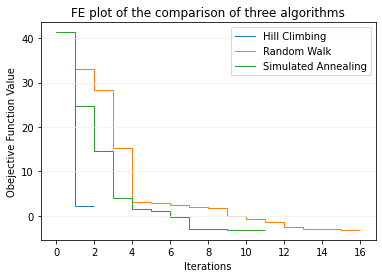

In [112]:
import matplotlib.pyplot as plt
plt.stairs(HC, label='Hill Climbing', baseline=None)
plt.stairs(RW, label='Random Walk', baseline=None)
plt.stairs(SA, label='Simulated Annealing', baseline=None)

plt.xlabel('Iterations')
plt.ylabel('Obejective Function Value')
plt.title('FE plot of the comparison of three algorithms')
# plt.xlim()
# plt.ylim()
plt.grid(axis='y', color='0.95')

plt.legend(loc=1)

plt.show()

In [113]:
import json

with open('result\First_Part\RW.json', 'w') as f:
    json.dump(RW, f)

with open('result\First_Part\HC.json', 'w') as f:
    json.dump(HC, f)

with open('result\First_Part\SA.json', 'w') as f:
    json.dump(SA, f)